# 实验2.1 多项式插值的振荡现象

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9.0, 6.0)

<font size=4>代码正常运行需要python3以及其下的numpy和matplotlib包</font>

In [2]:
def lagrange(xarr, yarr, x):
    """
    func to give the interpolation value at x
    based on the given points (xarr,yarr)
    """
    
    if len(xarr) != len(yarr):
        raise(ValueError("the length of x&y arrays must be equal!"))
    
    npoints = len(xarr)
    l = np.empty(npoints)

    for i in range(npoints):
        l[i] = 1
        for j in range(npoints):
            if j != i:
                l[i] = l[i]*(x-xarr[j])/(xarr[i]-xarr[j])
            else:
                continue
                
    y = 0
    for i in range(npoints):
        y += yarr[i]*l[i]
        
    return y

## (1)   
<font size=4>$f(x)=\frac1{1+25x^2},\; L_n(x)=\sum\limits_{i=0}^n\frac1{1+25x_i^2}l_i(x)$</font>

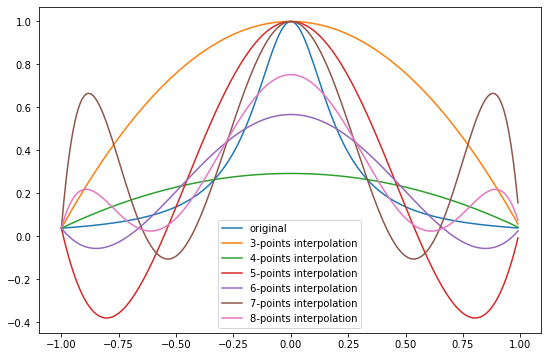

In [3]:
# use max_no to specify the maximumal order of Lagrange func
max_lag = 7
x_plot = np.arange(-1,1,0.01)
y_plots = np.empty((max_lag, len(x_plot)))

# the original function points
y_plots[0] = (lambda x : 1/(1+25*x**2))(x_plot)

# the interpolation points based on various no of points
for no in range(3, max_lag+2):
    x_arr = np.linspace(-1, 1, no)
    y_arr = (lambda x : 1/(1+25*x**2))(x_arr)
    y_plots[no - 2] = np.array(list(map(lambda x : lagrange(x_arr, y_arr, x), x_plot)))
    
# plot
for i in range(max_lag):
    if i == 0:
        plt.plot(x_plot, y_plots[i], label="original")
    else:
        plt.plot(x_plot, y_plots[i], label=str(i+2)+"-points interpolation")

plt.legend()
plt.show()

<font size=4>可以看到随着分点数目增多,插值多项式函数未必逼近原函数, 而且在靠近边界处会出现越来越剧烈的振荡现象</font>

## (2)

### 对于$h(x)=\frac{x}{1+x^4},\; x\in[-5,5]$

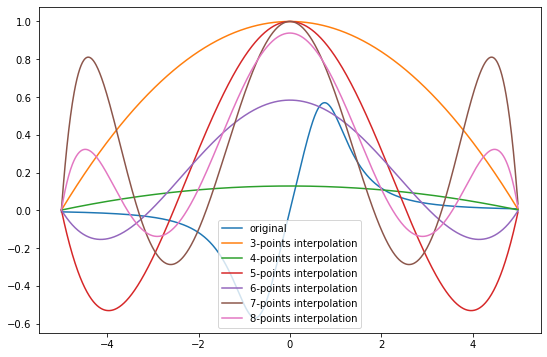

In [4]:
# use max_no to specify the maximumal order of Lagrange func
max_lag = 7
x_plot = np.arange(-5,5,0.01)
y_plots = np.empty((max_lag, len(x_plot)))

# the original function points
y_plots[0] = (lambda x : x/(1+x**4))(x_plot)

# the interpolation points based on various no of points
for no in range(3, max_lag+2):
    x_arr = np.linspace(-5, 5, no)
    y_arr = (lambda x : 1/(1+x**4))(x_arr)
    y_plots[no - 2] = np.array(list(map(lambda x : lagrange(x_arr, y_arr, x), x_plot)))
    
# plot
for i in range(max_lag):
    if i == 0:
        plt.plot(x_plot, y_plots[i], label="original")
    else:
        plt.plot(x_plot, y_plots[i], label=str(i+2)+"-points interpolation")

plt.legend()
plt.show()

### 对于$h(x)=\arctan x,\; x\in[-5,5]$

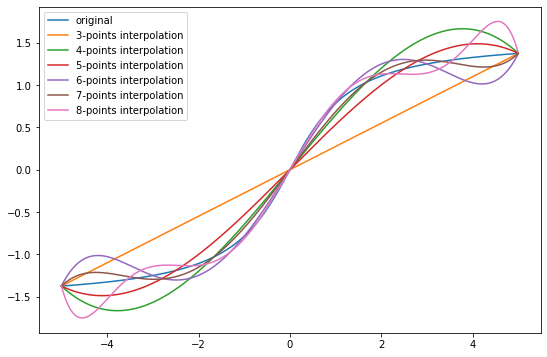

In [5]:
# use max_no to specify the maximumal order of Lagrange func
max_lag = 7
x_plot = np.arange(-5,5,0.01)
y_plots = np.empty((max_lag, len(x_plot)))

# the original function points
y_plots[0] = (lambda x : np.arctan(x))(x_plot)

# the interpolation points based on various no of points
for no in range(3, max_lag+2):
    x_arr = np.linspace(-5, 5, no)
    y_arr = (lambda x : np.arctan(x))(x_arr)
    y_plots[no - 2] = np.array(list(map(lambda x : lagrange(x_arr, y_arr, x), x_plot)))
    
# plot
for i in range(max_lag):
    if i == 0:
        plt.plot(x_plot, y_plots[i], label="original")
    else:
        plt.plot(x_plot, y_plots[i], label=str(i+2)+"-points interpolation")

plt.legend()
plt.show()

<font size=4>从上面的两个例子也可以得出相同的结论.</font>